In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
equipaments = pd.read_csv("results/equipaments_model.csv")

In [ ]:
X = equipaments[["Latitud", "Longitud"]].values

In [4]:
X

array([[41.30764532,  2.01030371],
       [41.31909414,  2.01330786],
       [41.31553192,  2.01597241],
       [41.31541843,  2.02154067],
       [41.30970006,  2.00607   ],
       [41.31586012,  2.00646259],
       [41.31895067,  2.01971375],
       [41.29338135,  2.02380366],
       [41.31696393,  2.02548393],
       [41.31288902,  2.01606813],
       [41.30749819,  2.00584755],
       [41.32172809,  2.01849   ],
       [41.31545365,  2.01788254],
       [41.30774442,  2.02638597],
       [41.31916198,  2.01281622],
       [41.31979072,  2.01576464],
       [41.31002768,  2.00698004],
       [41.3213687 ,  2.01490415],
       [41.3150186 ,  2.02079853],
       [41.3198123 ,  2.00621405],
       [41.31406676,  2.02377751],
       [41.31472846,  2.02209218],
       [41.3215002 ,  2.0219539 ],
       [41.32064001,  2.01101226],
       [41.32023873,  2.01046314],
       [41.30897796,  2.00947226],
       [41.32337563,  2.02879214],
       [41.30898123,  2.0099052 ],
       [41.31670896,

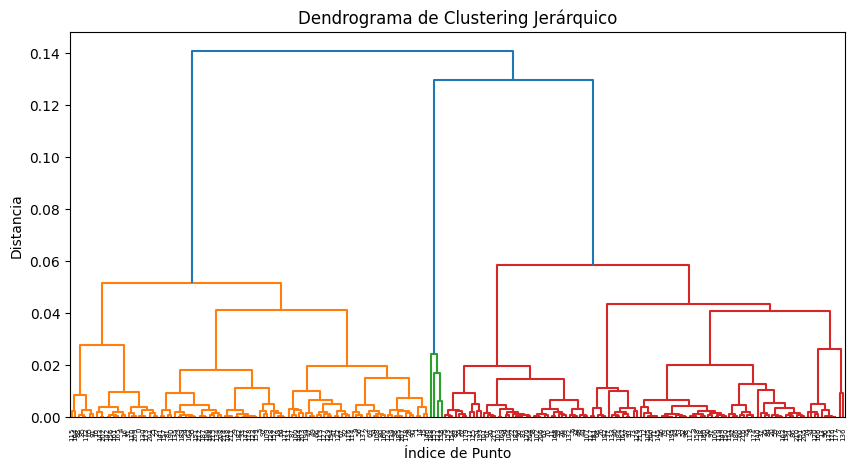

In [5]:
plt.figure(figsize=(10, 5))
linked = sch.linkage(X, method='ward')
sch.dendrogram(linked)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de Punto")
plt.ylabel("Distancia")
plt.show()


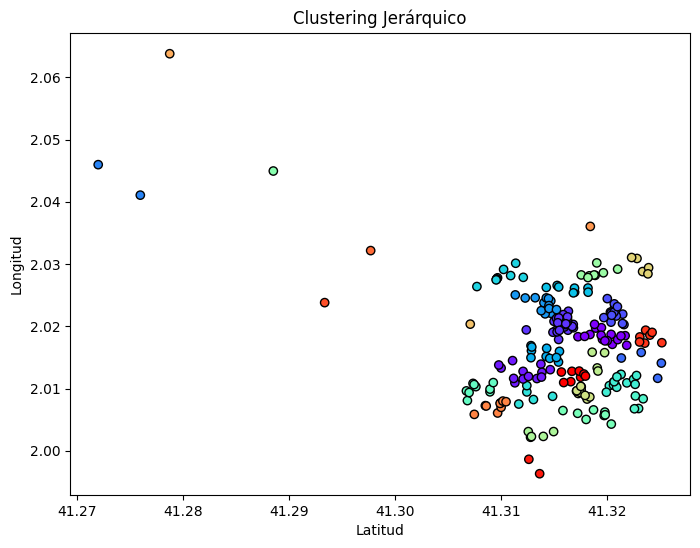

In [10]:
n_clusters = 30  # Ajusta el número de clusters según el dendrograma
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X)

# Visualización de los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', marker='o', edgecolors='k')
plt.title("Clustering Jerárquico")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

In [11]:
import folium

colores = ['blue', 'green', 'purple']

# Centro del mapa
map_center = [X[:, 0].mean(), X[:, 1].mean()]
mapa = folium.Map(location=map_center, zoom_start=13)

# Añadir los puntos al mapa
for i, label in enumerate(labels):
    lat, lon = X[i]
    folium.CircleMarker(
        location=[lat, lon],
        radius=6,
        color=colores[label],
        fill=True,
        fill_color=colores[label],
        fill_opacity=0.6
    ).add_to(mapa)

mapa

IndexError: list index out of range